# SMOTE-NC

Extends SMOTE functionality to categorical variables.

In [120]:
# import libraries

import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn 
from sklearn.datasets import make_blobs

# from imblearn
from imblearn.over_sampling import SMOTENC

In [121]:
# creating toy dataset

X, y = make_blobs(n_samples=1600, n_features=2, centers=[(0,0),(5,5)], random_state= 42,  cluster_std=1.5)

X.shape, y.shape

((1600, 2), (1600,))

In [122]:
# creating a data frame 

X = pd.DataFrame(data = X, columns = ['varA', 'varB'])
y = pd.Series(y)

# adding categorical features
rng = np.random.RandomState(42)
X['varC'] = rng.choice(['A','B','C'], size=1600).astype(object)
X['varD'] = rng.choice(['Blue','Green','Red'], size=1600).astype(object)


# now, under sample the data for y ==1 
X = pd.concat([X[y == 0], X[y==1].sample(200, random_state=42)], axis = 0)

y = y.loc[X.index]

# display the shape
X.shape, y.shape

((1000, 4), (1000,))

In [123]:
# check the value counts for the target class
y.value_counts()

0    800
1    200
dtype: int64

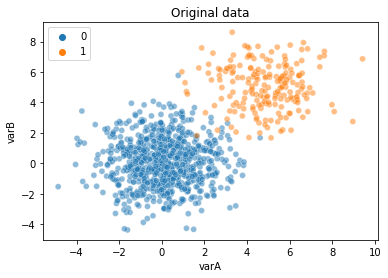

In [125]:
# plot the original data as per the target class

sns.scatterplot(data = X, x = 'varA', y = 'varB', hue = y, alpha=0.5)
plt.title('Original data')
plt.show()

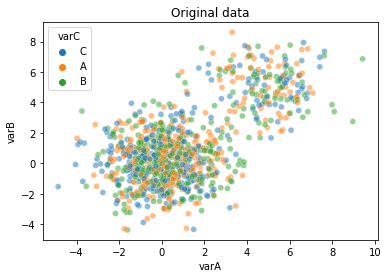

In [126]:
# plot the original data as per the varC

sns.scatterplot(data = X, x = 'varA', y = 'varB', hue = 'varC', alpha=0.5)
plt.title('Original data')
plt.show()

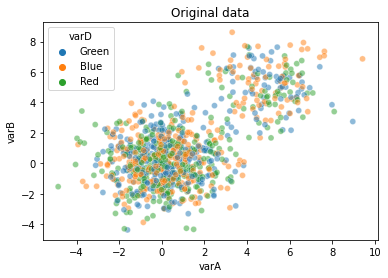

In [127]:
# plot the original data as per the varD

sns.scatterplot(data = X, x = 'varA', y = 'varB', hue = 'varD', alpha=0.5)
plt.title('Original data')
plt.show()

## SMOTE-NC

[SMOTENC](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html)

In [128]:
# create RandomSampler object

smote = SMOTENC(categorical_features= [2,3], # indexes of the categorical columns
                sampling_strategy='auto', # samples from the minority class-- this is default
                        random_state=0,
             k_neighbors=5,
             n_jobs=2) 

X_resampled, y_resampled = smote.fit_resample(X,y)
X_resampled.shape, y_resampled.shape

((1600, 4), (1600,))

In [129]:
# original data shape
X.shape, y.shape

((1000, 4), (1000,))

In [130]:
# balance values
# original data
y.value_counts()

0    800
1    200
dtype: int64

In [131]:
y_resampled.value_counts()

0    800
1    800
dtype: int64

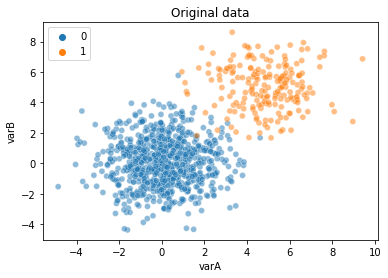

In [132]:
# plot the original data

sns.scatterplot(data = X, x = 'varA', y = 'varB', hue = y, alpha=0.5)
plt.title('Original data')
plt.show()

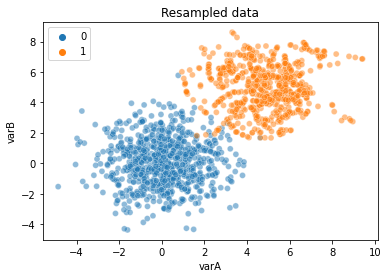

In [133]:
# plot the resampled data

# plot the original data

sns.scatterplot(data = X_resampled, x = 'varA', y = 'varB', hue = y_resampled, alpha=0.5)
plt.title('Resampled data')
plt.show()

- SO, here we can see new observations being added in the minority class.

## Multi Class Data

In [134]:
# create a multi class dataset

X, y = make_blobs(n_samples=1600,
           n_features=3,
           cluster_std=1.5,
           centers=[(0,0),(5,5),(-1,5)],
           random_state=42)

X.shape, y.shape

((1600, 2), (1600,))

In [135]:
# convert into a DataFrame and series
X = pd.DataFrame(data = X, columns = ['varA', 'varB'])
y = pd.Series(y)

# adding categorical features
rng = np.random.RandomState(42)
X['varC'] = rng.choice(['A','B','C'], size=1600).astype(object)
X['varD'] = rng.choice(['Blue','Green','Red'], size=1600).astype(object)

# concat
X = pd.concat([X[y==0],
             X[y==1].sample(100, random_state=42),
             X[y==2].sample(100, random_state=42)],
             axis = 0)
y = y.loc[X.index]

X.shape, y.shape

((734, 4), (734,))

In [136]:
y.value_counts()

0    534
1    100
2    100
dtype: int64

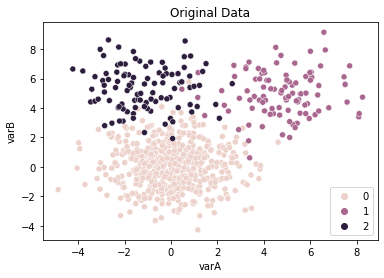

In [138]:
# plot

sns.scatterplot(data = X, x = 'varA', y ='varB', hue = y)
plt.title('Original Data')
plt.show()

In [139]:
## Perform Random Oversampling

smote = SMOTENC(categorical_features=[2,3],
                sampling_strategy='not majority', # samples from all class except the majority one
                       random_state=0,
             k_neighbors=5,
             n_jobs=2)

X_res, y_res = smote.fit_resample(X,y)
X_res.shape, y_res.shape

((1602, 4), (1602,))

In [140]:
y_res.value_counts()

0    534
1    534
2    534
dtype: int64

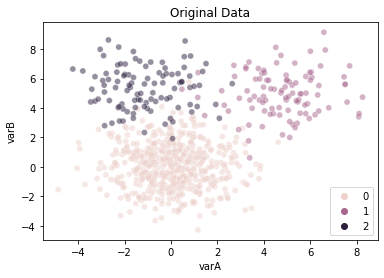

In [141]:
# plot

sns.scatterplot(data = X, x = 'varA', y ='varB', hue = y, alpha = 0.5)
plt.title('Original Data')
plt.show()

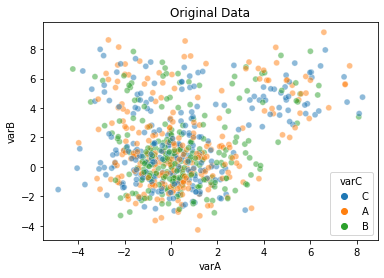

In [143]:
# plot original data as per varC

sns.scatterplot(data = X, x = 'varA', y ='varB', hue = 'varC', alpha = 0.5)
plt.title('Original Data')
plt.show()

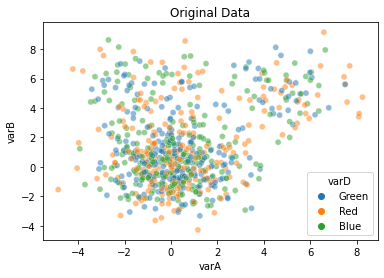

In [144]:
# plot original data as per varD

sns.scatterplot(data = X, x = 'varA', y ='varB', hue = 'varD', alpha = 0.5)
plt.title('Original Data')
plt.show()

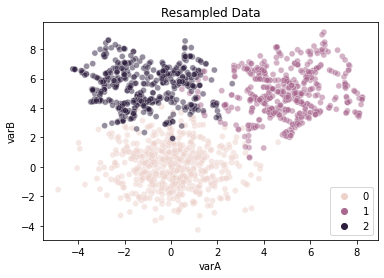

In [142]:
# Resampled

sns.scatterplot(data = X_res, x = 'varA', y ='varB', hue = y_res, alpha = 0.5)
plt.title('Resampled Data')
plt.show()

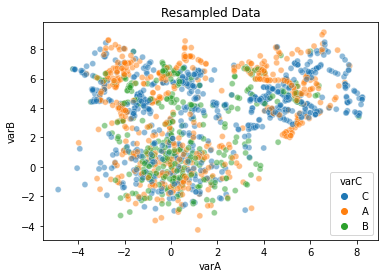

In [145]:
# Resampled as per varC

sns.scatterplot(data = X_res, x = 'varA', y ='varB', hue = 'varC', alpha = 0.5)
plt.title('Resampled Data')
plt.show()

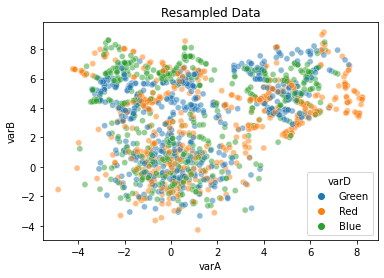

In [146]:
# Resampled as per varD

sns.scatterplot(data = X_res, x = 'varA', y ='varB', hue = 'varD', alpha = 0.5)
plt.title('Resampled Data')
plt.show()

- Similarly, we can see new and more observations for classes 1 and 2 which contains over sampled observations